In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_excel('data/train.xlsx')

In [3]:
# Reshape the data from wide to long format
long_format = data.melt(
    id_vars=["PRICES"], 
    var_name="Hour", 
    value_name="Price"
)

# Clean and standardize the "Hour" column to extract hour values
long_format["Hour"] = long_format["Hour"].str.extract(r'(\d+)').astype(int)

# Combine date and hour into a single datetime column
long_format["Timestamp"] = pd.to_datetime(long_format["PRICES"]) + pd.to_timedelta(long_format["Hour"] - 1, unit='h')

# Sort by the timestamp
time_series = long_format[["Timestamp", "Price"]].sort_values(by="Timestamp").reset_index(drop=True)

# Display the transformed time series
time_series.head()


,Timestamp,Price
0,2007-01-01 00:00:00,24.31
1,2007-01-01 01:00:00,24.31
2,2007-01-01 02:00:00,21.71
3,2007-01-01 03:00:00,8.42
4,2007-01-01 04:00:00,0.01


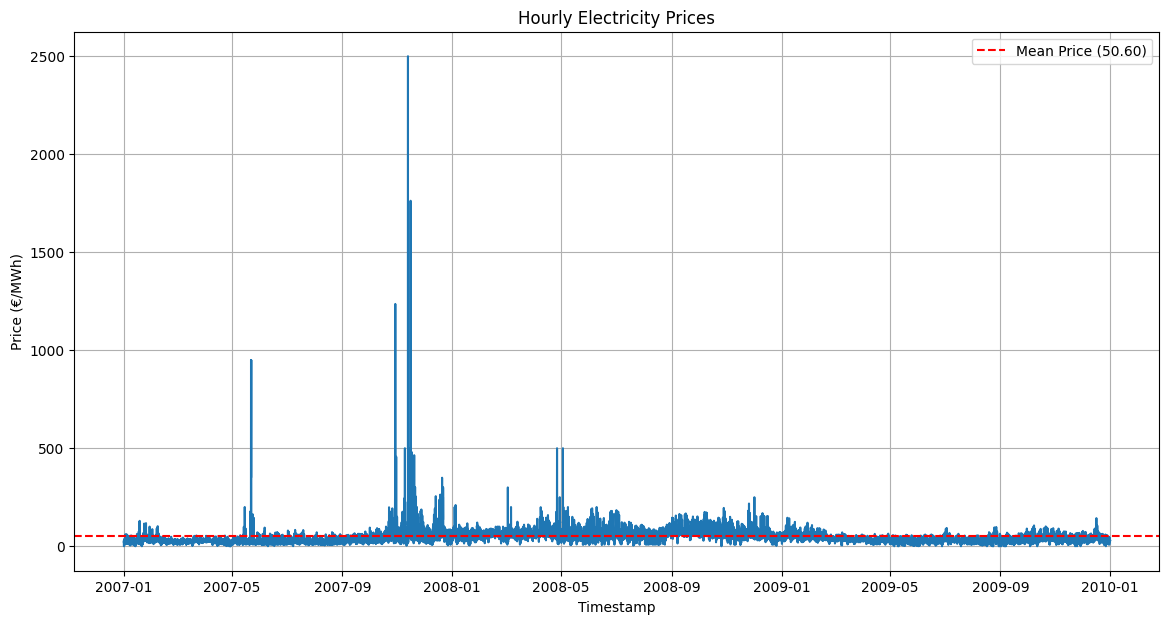

In [4]:
# Plot the time series
plt.figure(figsize=(14, 7))
sns.lineplot(x="Timestamp", y="Price", data=time_series)
plt.title("Hourly Electricity Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price (€/MWh)")
plt.axhline(y=time_series["Price"].mean(), color='r', linestyle='--', label=f"Mean Price ({time_series['Price'].mean():.2f})")
plt.grid(True)
plt.legend()
plt.show()


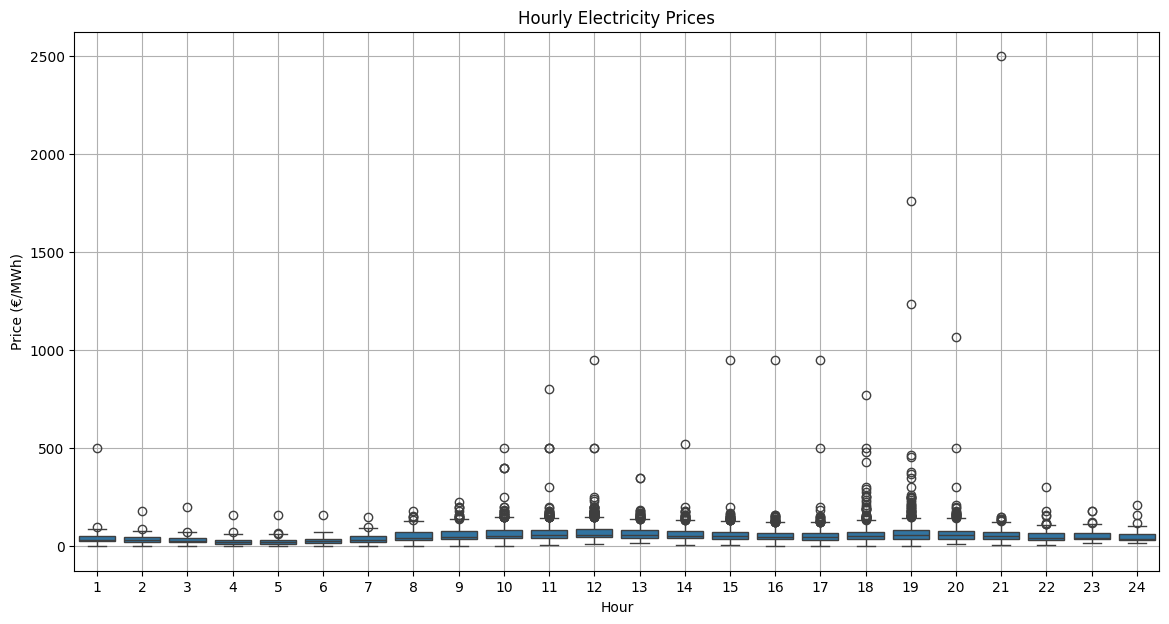

In [5]:
# Plot the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x="Hour", y="Price", data=long_format)
plt.title("Hourly Electricity Prices")
plt.xlabel("Hour")
plt.ylabel("Price (€/MWh)")
plt.grid(True)
plt.show()

In [16]:
# Detect outliers
Q1 = long_format["Price"].quantile(0.25)
Q3 = long_format["Price"].quantile(0.75)
IQR = Q3 - Q1
outliers = long_format[(long_format["Price"] < Q1 - 1.5 * IQR) | (long_format["Price"] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

Number of outliers: 823
Q1: 29.90
Q3: 65.00
IQR: 35.10


In [7]:
# Divide the time series into to clusters based on a threshold and the mean price
mean_price = time_series["Price"].mean()
threshold = 120

time_series["Cluster by threshold"] = "Low"
time_series.loc[time_series["Price"] > threshold, "Cluster by threshold"] = "High"

time_series["Cluster by mean"] = "Low"
time_series.loc[time_series["Price"] > mean_price, "Cluster by mean"] = "High"


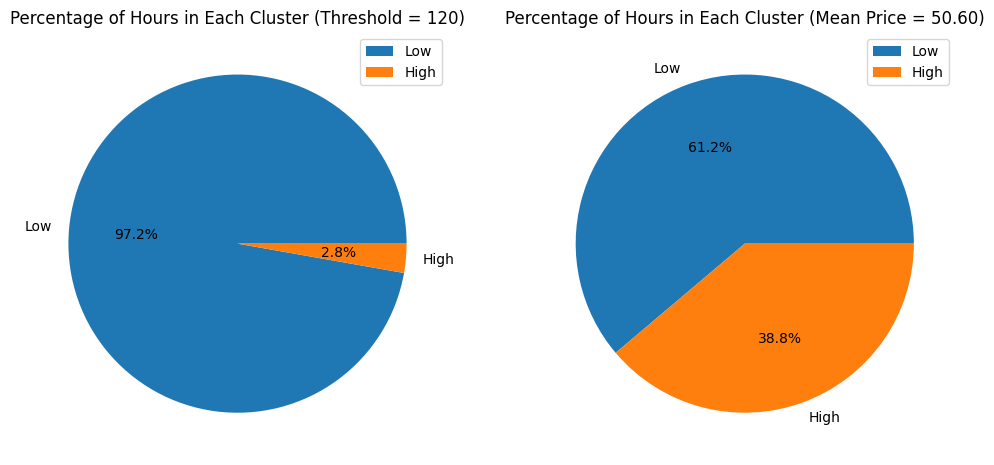

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
time_series["Cluster by threshold"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title(f"Percentage of Hours in Each Cluster (Threshold = {threshold})")
axes[0].set_ylabel("")
axes[0].legend()

time_series["Cluster by mean"].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title(f"Percentage of Hours in Each Cluster (Mean Price = {mean_price:.2f})")
axes[1].set_ylabel("")
axes[1].legend()
plt.show() 


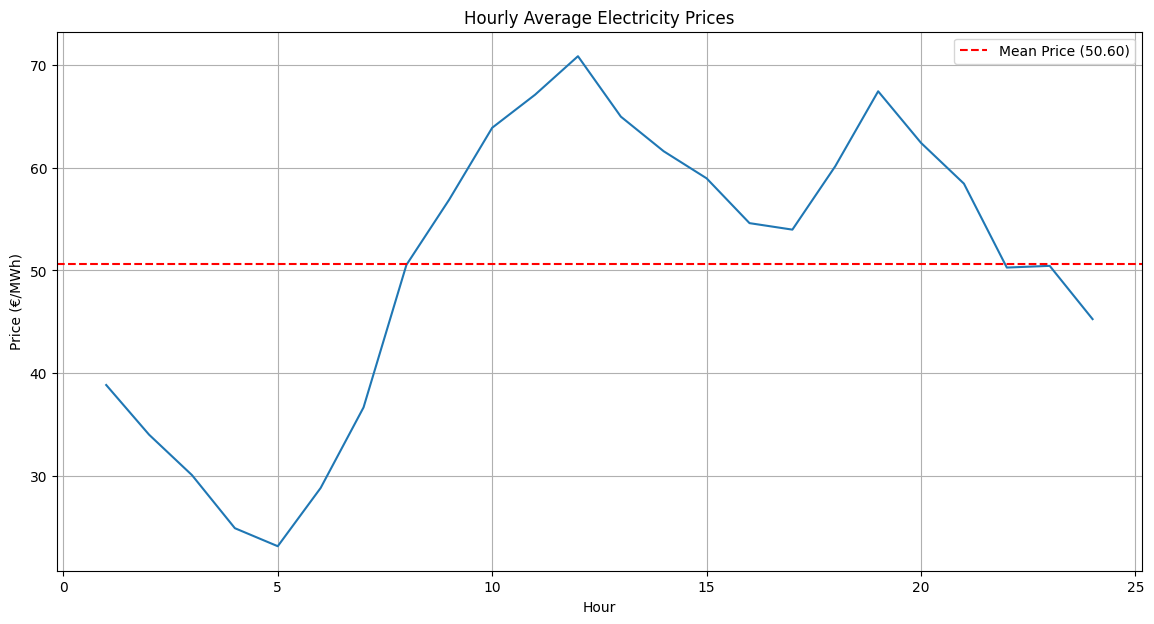

In [9]:
# Compute the hourly average prices
hourly_prices = long_format.groupby("Hour")["Price"].mean()

# Plot the hourly average prices
plt.figure(figsize=(14, 7))
sns.lineplot(x=hourly_prices.index, y=hourly_prices.values)
plt.title("Hourly Average Electricity Prices")
plt.xlabel("Hour")
plt.ylabel("Price (€/MWh)")
plt.axhline(y=hourly_prices.mean(), color='r', linestyle='--', label=f"Mean Price ({hourly_prices.mean():.2f})")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_5521/4288257597.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_prices = time_series.resample("D", on="Timestamp").mean()


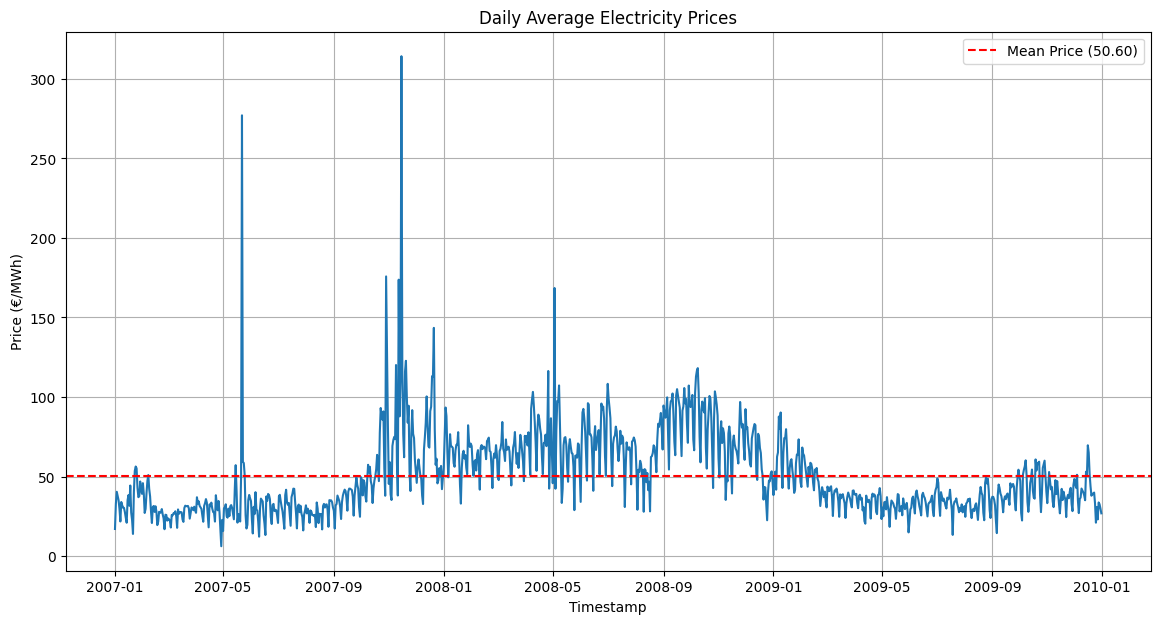

In [10]:
# Compute the daily average prices
daily_prices = time_series.resample("D", on="Timestamp").mean()

# Plot the daily average prices
plt.figure(figsize=(14, 7))
sns.lineplot(x="Timestamp", y="Price", data=daily_prices)
plt.title("Daily Average Electricity Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price (€/MWh)")
plt.axhline(y=daily_prices["Price"].mean(), color='r', linestyle='--', label=f"Mean Price ({daily_prices['Price'].mean():.2f})")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_5521/778863071.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_prices = time_series.resample("M", on="Timestamp").mean()


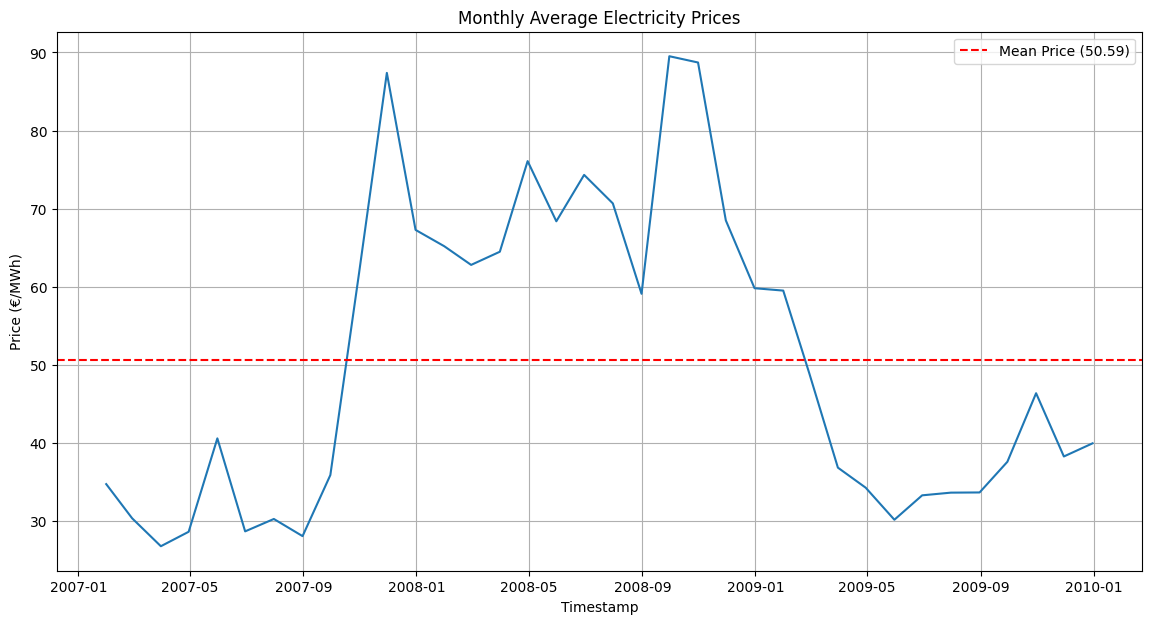

In [11]:
# Compute the monthly average prices
monthly_prices = time_series.resample("M", on="Timestamp").mean()

# Plot the monthly average prices
plt.figure(figsize=(14, 7))
sns.lineplot(x="Timestamp", y="Price", data=monthly_prices)
plt.title("Monthly Average Electricity Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price (€/MWh)")
plt.axhline(y=monthly_prices["Price"].mean(), color='r', linestyle='--', label=f"Mean Price ({monthly_prices['Price'].mean():.2f})")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/vl/zqr5_x4s345b31bjh6wnsv9c0000gn/T/ipykernel_5521/3296834070.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_prices = time_series.resample("Y", on="Timestamp").mean()


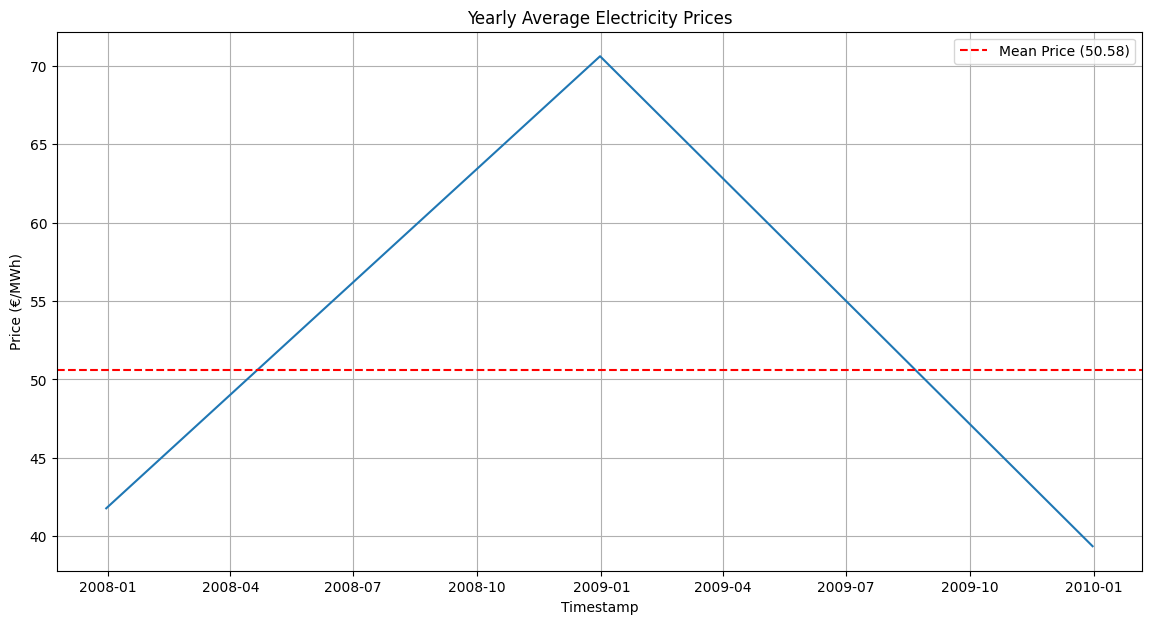

In [12]:
# Compute the yearly average prices
yearly_prices = time_series.resample("Y", on="Timestamp").mean()

# Plot the yearly average prices
plt.figure(figsize=(14, 7))
sns.lineplot(x="Timestamp", y="Price", data=yearly_prices)
plt.title("Yearly Average Electricity Prices")
plt.xlabel("Timestamp")
plt.ylabel("Price (€/MWh)")
plt.axhline(y=yearly_prices["Price"].mean(), color='r', linestyle='--', label=f"Mean Price ({yearly_prices['Price'].mean():.2f})")
plt.grid(True)
plt.legend()
plt.show()

In [13]:
import pandas as pd
import plotly.graph_objects as go


hour_columns = [col for col in data.columns if 'Hour' in col]

# Create the base figure
fig = go.Figure()


for hour in hour_columns:
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(data['PRICES']),
            y=data[hour],
            mode='lines',
            name=hour,
            visible=False  # Start with all traces hidden
        )
    )


fig.data[0].visible = True

# Create buttons for each hour
buttons = []
for i, hour in enumerate(hour_columns):
    buttons.append(
        dict(
            label=hour,
            method='update',
            args=[
                {'visible': [j == i for j in range(len(hour_columns))]},  # Toggle visibility
                {'title': f'Energy Prices for {hour}'}  # Update title
            ]
        )
    )

# Update layout with buttons
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction='down',
            showactive=True,
            x=1.05,  # Position to the right of the plot
            y=1.5,
            xanchor='left',
            yanchor='middle',
        )
    ],
    title='Energy Prices by Hour',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly'
)

# Show the interactive dashboard
fig.show()
